In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
import os
import warnings

warnings.filterwarnings('ignore')

In [2]:
#Loading the dataset downloaded from kaggle 
file_path = 'weatherAUS.csv'  
raw_data = pd.read_csv(file_path)

##  Basic data exploratory analysis

In [3]:
print("\nDataset Shape (Rows, Columns):")
print(raw_data.shape)


Dataset Shape (Rows, Columns):
(145460, 23)


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
print(raw_data.head(2))

         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   

   RainTomorrow  
0            No  
1            No  

[2 rows x 23 columns]


In [6]:
raw_data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [7]:
numeric_columns = raw_data.select_dtypes(include=['float64']).columns
binary_columns = [col for col in raw_data.columns if raw_data[col].nunique() == 2]
categorical_columns = [col for col in raw_data.select_dtypes(include=['object']).columns if col not in binary_columns]


print("\nNumeric Columns:")
print(numeric_columns)

print("\nBinary Columns:")
print(binary_columns)

print("\nCategorical Columns:")
print(categorical_columns)


Numeric Columns:
Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

Binary Columns:
['RainToday', 'RainTomorrow']

Categorical Columns:
['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']


In [8]:
raw_data.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

In [9]:
print("\nNull Values in Each Column:")
print(raw_data.isnull().sum())


Null Values in Each Column:
Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64


In [10]:
print("\n Percentage of Null Values in Each Column:")
null_percentage = (raw_data.isnull().sum() / len(raw_data)) * 100
sorted_null_percentage = null_percentage.sort_values(ascending=False)
print(sorted_null_percentage)


 Percentage of Null Values in Each Column:
Sunshine         48.009762
Evaporation      43.166506
Cloud3pm         40.807095
Cloud9am         38.421559
Pressure9am      10.356799
Pressure3pm      10.331363
WindDir9am        7.263853
WindGustDir       7.098859
WindGustSpeed     7.055548
Humidity3pm       3.098446
WindDir3pm        2.906641
Temp3pm           2.481094
RainTomorrow      2.245978
Rainfall          2.241853
RainToday         2.241853
WindSpeed3pm      2.105046
Humidity9am       1.824557
Temp9am           1.214767
WindSpeed9am      1.214767
MinTemp           1.020899
MaxTemp           0.866905
Location          0.000000
Date              0.000000
dtype: float64


## Data Cleaning

#### Step 1: Check for duplicates

In [11]:
duplicates = raw_data.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicates}")


Number of Duplicate Rows: 0


#### Step 2: Handling Null Values

In [12]:
df = raw_data.copy()

# Handle Missing Values in Numeric Columns
for col in numeric_columns:
    df[col] = df.groupby('Location')[col].transform(lambda x: x.fillna(x.median()))
    
    # replacing the nulls with median of the column
    if df[col].isnull().any():
        df[col].fillna(df[col].median(), inplace=True)

# Droped rows where target variables RainTomorrow are missing
df.dropna(subset=binary_columns, inplace=True)

# Handle Missing Values in Categorical Columns
for col in categorical_columns:
    if col != 'Date':  # Skip Date column for better generalization of model
        # missing categorical values are replaced with mode
        df[col] = df.groupby('Location')[col].transform(
            lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'N/A'))


#### Step 3: Making sure Date format is correct

In [13]:
df['Date'] = pd.to_datetime(df['Date'])


#### Step 4: # Convert binary columns to numeric

In [14]:

df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})

print("\nFinal Dataset Shape:", df.shape)

df.to_csv('weather_processed.csv', index=False)
print("\nPreprocessing complete. Processed dataset saved as 'weather_processed.csv'")

print("\nMissing Values After Processing:")
print(df.isnull().sum())


Final Dataset Shape: (140787, 23)

Preprocessing complete. Processed dataset saved as 'weather_processed.csv'

Missing Values After Processing:
Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64


## Data Pre-Processing

In [15]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


### Feature Engineering and balancing

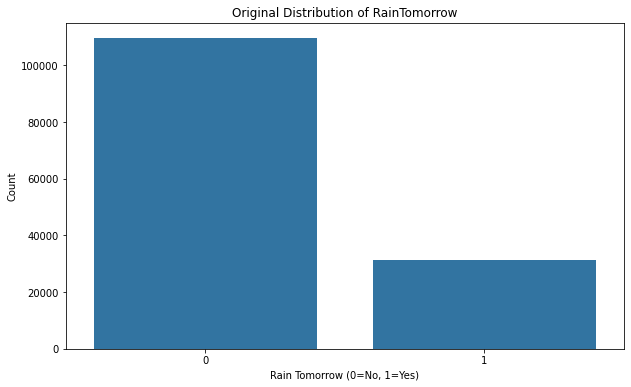


Original Class Distribution:
0    109586
1     31201
Name: RainTomorrow, dtype: int64

Original Class Distribution Percentage:
0    77.838153
1    22.161847
Name: RainTomorrow, dtype: float64


In [16]:
# Load the data that was cleaned earlier (have created different files as it's easier to do changes later on.)
df = pd.read_csv('weather_processed.csv')

# Feature Engineering
# 1) Feature reducation
df['Humidity_diff'] = df['Humidity3pm'] - df['Humidity9am']
df['Pressure_change'] = df['Pressure3pm'] - df['Pressure9am']

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='RainTomorrow')
plt.title('Original Distribution of RainTomorrow')
plt.xlabel('Rain Tomorrow (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()

print("\nOriginal Class Distribution:")
print(df['RainTomorrow'].value_counts())
print("\nOriginal Class Distribution Percentage:")
print(df['RainTomorrow'].value_counts(normalize=True) * 100)
######################### conclusion: IMBALANCED DATASET#######################


### Dataset Balancing

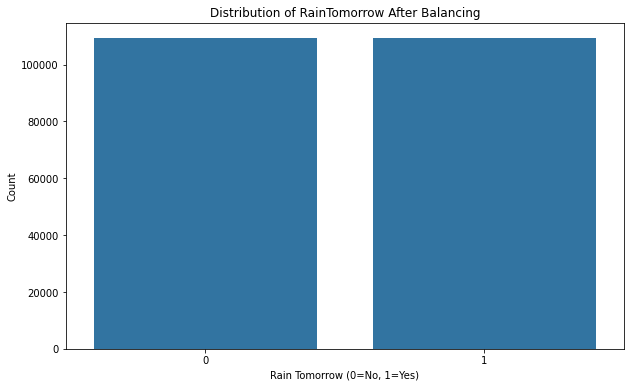


Balanced Class Distribution:
Counter({0: 109310, 1: 109310})

Balanced Class Distribution Percentage:
0    50.0
1    50.0
Name: RainTomorrow, dtype: float64

Original dataset shape: (140787, 25)
Balanced dataset shape: (218620, 24)

Balanced dataset saved as 'weather_balanced.csv'

Sample counts:
Original Imbalanced dataset: Counter({0: 109586, 1: 31201})
After balancing: Counter({0: 109310, 1: 109310})


In [17]:
X = df.drop(['RainTomorrow', 'Date'], axis=1)
y = df['RainTomorrow']

# Feature encoding using label encoding for categorical columns for balancing
categorical_columns = X.select_dtypes(include=['object']).columns
label_encoders = {}

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])
    
###################### Balancing the dataset for better modelling ##########################

sampler = SMOTETomek(random_state=42)
X_balanced, y_balanced = sampler.fit_resample(X, y)

X_balanced_df = pd.DataFrame(X_balanced, columns=X.columns)
for column in categorical_columns:
    X_balanced_df[column] = label_encoders[column].inverse_transform(X_balanced_df[column])

df_balanced = pd.concat([
    X_balanced_df,
    pd.Series(y_balanced, name='RainTomorrow')
], axis=1)


plt.figure(figsize=(10, 6))
sns.countplot(data=df_balanced, x='RainTomorrow')
plt.title('Distribution of RainTomorrow After Balancing')
plt.xlabel('Rain Tomorrow (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()

print("\nBalanced Class Distribution:")
print(Counter(y_balanced))
print("\nBalanced Class Distribution Percentage:")
balanced_percentages = pd.Series(y_balanced).value_counts(normalize=True) * 100
print(balanced_percentages)

print("\nOriginal dataset shape:", df.shape)
print("Balanced dataset shape:", df_balanced.shape)

df_balanced.to_csv('weather_balanced.csv', index=False)
print("\nBalanced dataset saved as 'weather_balanced.csv'")

print("\nSample counts:")
print("Original Imbalanced dataset:", Counter(y))
print("After balancing:", Counter(y_balanced))

### Feature selection

In [18]:
#Load the balanced dataset created earlier, have created this file seprately since i changed the balancing methods 
#from undersampling to SMOTETomek which improved the model performace by 10%

df = pd.read_csv('weather_balanced.csv')
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = numeric_columns.drop('RainTomorrow')
print(raw_data.head(2))

         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   

   RainTomorrow  
0            No  
1            No  

[2 rows x 23 columns]


In [19]:
X = df[numeric_columns]
y = df['RainTomorrow']
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Chi-square feature selection
selector = SelectKBest(chi2, k='all')
selector.fit(X_scaled, y)
scores = pd.DataFrame({
    'Feature': numeric_columns,
    'Score': selector.scores_
}).sort_values('Score', ascending=False)

print("Top Important Features:")
print(scores)

Top Important Features:
            Feature         Score
16        RainToday  10784.756352
9       Humidity3pm   4648.778344
13         Cloud3pm   2587.051476
4          Sunshine   2465.721835
12         Cloud9am   2126.168089
8       Humidity9am   1074.404300
2          Rainfall    901.530783
5     WindGustSpeed    573.793609
17    Humidity_diff    411.516628
15          Temp3pm    410.656949
10      Pressure9am    356.347769
1           MaxTemp    286.012858
11      Pressure3pm    275.726743
7      WindSpeed3pm    111.668672
0           MinTemp    105.670209
6      WindSpeed9am    104.038440
3       Evaporation     47.648132
14          Temp9am      8.127224
18  Pressure_change      5.515660


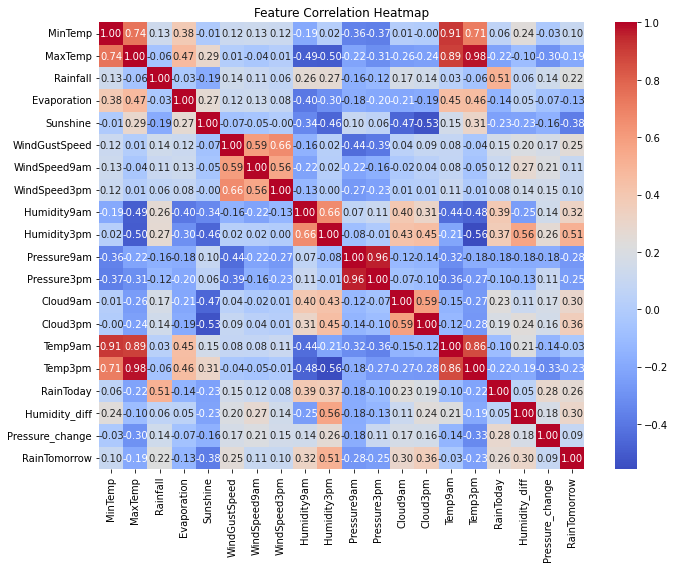

In [20]:
plt.figure(figsize=(10, 8))
correlation = df[list(numeric_columns) + ['RainTomorrow']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

### Final Feature selected for modeling and Feature Encoding

In [21]:

important_numerical = ['RainToday', 'Humidity3pm', 'Sunshine', 'Cloud3pm', 
                      'Cloud9am', 'Humidity9am', 'Rainfall', 'WindGustSpeed', 'Temp3pm']
important_categorical = ['WindGustDir', 'WindDir9am', 'WindDir3pm']

df_selected = df[important_numerical + important_categorical + ['RainTomorrow']]

# Apply Label Encoding to categorical features
label_encoder = LabelEncoder()
for col in important_categorical:
    df_selected[col] = label_encoder.fit_transform(df_selected[col])

# Save the final dataset
df_selected.to_csv('weather_final.csv', index=False)

print("Original shape:", df.shape)
print("Final shape:", df_selected.shape)
print("\nColumns in final dataset:", df_selected.columns.tolist())

Original shape: (218620, 24)
Final shape: (218620, 13)

Columns in final dataset: ['RainToday', 'Humidity3pm', 'Sunshine', 'Cloud3pm', 'Cloud9am', 'Humidity9am', 'Rainfall', 'WindGustSpeed', 'Temp3pm', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainTomorrow']


In [22]:
print("\nDataset Shape (Rows, Columns):")
print(df_selected.shape)
df_selected.info()


Dataset Shape (Rows, Columns):
(218620, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218620 entries, 0 to 218619
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   RainToday      218620 non-null  int64  
 1   Humidity3pm    218620 non-null  float64
 2   Sunshine       218620 non-null  float64
 3   Cloud3pm       218620 non-null  float64
 4   Cloud9am       218620 non-null  float64
 5   Humidity9am    218620 non-null  float64
 6   Rainfall       218620 non-null  float64
 7   WindGustSpeed  218620 non-null  float64
 8   Temp3pm        218620 non-null  float64
 9   WindGustDir    218620 non-null  int64  
 10  WindDir9am     218620 non-null  int64  
 11  WindDir3pm     218620 non-null  int64  
 12  RainTomorrow   218620 non-null  int64  
dtypes: float64(8), int64(5)
memory usage: 21.7 MB


In [23]:
print(df_selected.head(2))

   RainToday  Humidity3pm  Sunshine  Cloud3pm  Cloud9am  Humidity9am  \
0          0         22.0       8.4       7.0       8.0         71.0   
1          0         25.0       8.4       7.0       8.0         44.0   

   Rainfall  WindGustSpeed  Temp3pm  WindGustDir  WindDir9am  WindDir3pm  \
0       0.6           44.0     21.8           13          13          14   
1       0.0           44.0     24.3           14           6          15   

   RainTomorrow  
0             0  
1             0  
